# Modeling

## Imports

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

np.random.seed(51)

In [3]:
df = pd.read_csv("../data/clean_us_food_waste.csv")

### Feature Selection

In [53]:
df.head(5)

,year,tons_surplus,tons_supply,us_dollars_surplus,tons_waste,tons_uneaten,tons_inedible_parts,tons_not_fit_for_human_consumption,tons_donated,tons_biomaterial_processing,tons_animal_feed,tons_anaerobically_digested,tons_composted,tons_not_harvested,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,total_mtco2e_footprint,gallons_water_footprint,meals_wasted,sector_farm,sector_foodservice,sector_manufacturing,sector_residential,sector_retail,food_type_breads_&_bakery,food_type_dairy_&_eggs,food_type_dry_goods,food_type_fresh_meat_&_seafood,food_type_frozen,food_type_prepared_foods,food_type_produce,food_type_ready-to-drink_beverages,tons_productive_surplus,tons_unproductive_surplus,tons_consumed
0,2022,1.697411e+05,5.675411e+06,2.044225e+08,1.697411e+05,1.697411e+05,0.000000,8.291764e+04,0.000000,0.0,0.000000,0.0,0.0,1.697411e+05,0.000000,0.0,0.000000,0.0,0.000000,711793.038700,9.594215e+10,2.829019e+08,1,0,0,0,0,0,0,1,0,0,0,0,0,0.000000,1.697411e+05,5.505670e+06
1,2022,1.759466e+03,7.137274e+04,1.592708e+06,1.697192e+03,1.754997e+03,0.000000,8.444716e+02,4.469649,0.0,57.804547,0.0,0.0,1.672739e+03,0.065901,0.0,2.336496,0.0,22.050607,7361.864022,9.932335e+08,2.924994e+06,1,0,0,0,0,0,0,1,0,0,0,0,0,62.274196,1.697192e+03,6.961327e+04
2,2022,2.754374e+06,7.201575e+06,1.764610e+09,2.169203e+06,2.712374e+06,275437.430500,1.462724e+06,41999.936570,0.0,543171.777200,0.0,0.0,1.939425e+06,2513.788476,0.0,20060.812450,0.0,207202.855800,630928.959200,8.814583e+10,4.520624e+09,1,0,0,0,0,0,0,0,0,0,0,1,0,585171.713770,2.169203e+06,4.447201e+06
3,2022,1.220409e+04,3.828162e+04,1.206312e+07,9.641038e+03,1.202013e+04,854.285977,6.462121e+03,183.959352,0.0,2379.087594,0.0,0.0,8.634615e+03,3.105164,0.0,95.771389,0.0,907.546681,2793.826562,3.905911e+08,2.003354e+07,1,0,0,0,0,0,0,0,0,0,0,1,0,2563.046946,9.641038e+03,2.607753e+04
4,2022,3.942489e+03,3.957525e+04,4.730987e+06,2.870689e+03,3.867242e+03,2365.493625,2.544075e+03,75.247693,0.0,996.552384,0.0,0.0,2.450250e+03,1.084586,0.0,38.453500,0.0,380.901212,873.485791,1.259241e+08,6.445403e+06,1,0,0,0,0,0,0,0,0,0,0,1,0,1071.800077,2.870689e+03,3.563276e+04


In [6]:
X = df[["tons_consumed", "tons_donated", "tons_biomaterial_processing", "tons_animal_feed", "tons_anaerobically_digested", "tons_composted", 
        "tons_incinerated", "tons_land_application", "tons_landfilled", "tons_sewer", "tons_refuse_discards", "sector_farm", "sector_foodservice", 
        "sector_manufacturing", "sector_residential", "sector_retail", "food_type_breads_&_bakery", "food_type_dairy_&_eggs", "food_type_dry_goods", 
        "food_type_fresh_meat_&_seafood", "food_type_frozen", "food_type_prepared_foods", "food_type_produce", "food_type_ready-to-drink_beverages"]]
y = df["total_mtco2e_footprint"]

The features in the X matrix were chosen to allow for representation of all sectors and food types and to include all non-redundant numerical values.

## Preprocessing

### Splitting and Scaling

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Model Instantiation

In [9]:
lr = LinearRegression()

lasso = Lasso(max_iter=10000, tol=0.001) # Adjusted number of iterations and tolerance to allow model to converge

ridge = Ridge()

dtr = DecisionTreeRegressor()

rfr = RandomForestRegressor()

## Model Selection and Evaluation

In [10]:
def evaluate(X_train, y_train, X_test, y_test, preds, model):
    
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    mae = metrics.mean_absolute_error(y_test, preds)
    mse = metrics.mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)

    print(f'Train: {train}')
    print(f'Test: {test}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

    return {
        'Training Accuracy': train,
        'Test Accuracy': test,
        'MAE' : mae,
        'MSE' : mse,
        'RMSE' : rmse
    }

In [11]:
scores = []

The 'evaluate' function above will calculate the regression metrics of each model, and--when used in conjunction with the scores.append() method--will make selection of a model for the predictive app significantly more streamlined.

### Linear Regression

In [12]:
model1 = lr.fit(X_train_ss, y_train)

In [13]:
y_pred_1 = lr.predict(X_test_ss)

In [14]:
scores.append(evaluate(X_train_ss, y_train, X_test_ss, y_test, y_pred_1, model1))

Train: 0.949913850558376
Test: 0.96708519062423
MAE: 129392.97973561047
MSE: 78096135565.33041
RMSE: 279456.85814688896


### LASSO Regression

In [15]:
lasso_params = {
    'alpha' : [1, 5, 10]
}

In [16]:
lasso_gridsearch = GridSearchCV(lasso,
                                lasso_params,
                                cv = 5,
                                verbose = 1)

In [17]:
model2 = lasso_gridsearch.fit(X_train_ss, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [18]:
model2.best_score_

0.9461107791194404

In [19]:
model2.best_params_

{'alpha': 1}

In [20]:
best_model2 = model2.best_estimator_
best_model2.fit(X_train_ss, y_train)

Lasso(alpha=1, max_iter=10000, tol=0.001)

In [21]:
y_pred_2 = best_model2.predict(X_test_ss)

In [22]:
scores.append(evaluate(X_train_ss, y_train, X_test_ss, y_test, y_pred_2, best_model2))

Train: 0.9499138503102171
Test: 0.9670853222598297
MAE: 129391.15781300806
MSE: 78095823236.87306
RMSE: 279456.2993329602


### Ridge Regression

In [23]:
ridge_params = {
    'alpha' : [1, 5, 10]
}

In [24]:
ridge_gridsearch = GridSearchCV(ridge,
                                ridge_params,
                                cv = 5,
                                verbose = 1)

In [25]:
model3 = ridge_gridsearch.fit(X_train_ss, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [26]:
model3.best_score_

0.9461289854753006

In [27]:
model3.best_params_

{'alpha': 5}

In [28]:
best_model3 = model3.best_estimator_
best_model3.fit(X_train_ss, y_train)

Ridge(alpha=5)

In [29]:
y_pred_3 = best_model3.predict(X_test_ss)

In [30]:
scores.append(evaluate(X_train_ss, y_train, X_test_ss, y_test, y_pred_3, best_model3))

Train: 0.949904819105736
Test: 0.9670669157194531
MAE: 129404.57601155559
MSE: 78139495969.59738
RMSE: 279534.42716344865


### Decision Tree Regression

In [31]:
dtr_params = {
    'max_depth' : [50, 100, 200, 300], # Checks models where tree may be 50, 100, 200, or 300 nodes deep
    'min_samples_split' : [2, 4, 6], # Checks models where nodes split with 2, 4, or 6 samples
    'min_samples_leaf' : [1, 3, 5, 10] # Checks models where nodes terminate with 1, 3, 5, or 10 samples 
}

In [32]:
dtr_gridsearch = GridSearchCV(dtr,
                              dtr_params,
                              cv = 5,
                              verbose = 1)

In [33]:
model4 = dtr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [34]:
model4.best_score_

0.9837525982059349

In [35]:
model4.best_params_

{'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [36]:
best_model4 = model4.best_estimator_
best_model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [37]:
y_pred_4 = best_model4.predict(X_test)

In [38]:
scores.append(evaluate(X_train, y_train, X_test, y_test, y_pred_4, best_model4))

Train: 0.9999999999986454
Test: 0.994362614056355
MAE: 13918.248849523467
MSE: 13375683020.454878
RMSE: 115653.28797943826


### Random Forest Regression

In [173]:
rfr_params = {
    'n_estimators' : [50, 100, 200], # Checks RF models with 50, 100, or 200 Decision Trees
    'max_depth' : [10, 50, 100],
    'min_samples_split' : [2, 4],
    'min_samples_leaf' : [1, 5]
}

In [174]:
rfr_gridsearch = GridSearchCV(rfr,
                              rfr_params,
                              cv = 5,
                              verbose = 1)

In [175]:
model5 = rfr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [176]:
model5.best_score_

0.9955409406808127

In [177]:
model5.best_params_

{'max_depth': 100,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [178]:
best_model5 = model5.best_estimator_
best_model5.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=50)

In [39]:
with open('../models/co2_prediction_rf.pkl', 'rb') as f:
    best_model5 = pickle.load(f)

In [40]:
y_pred_5 = best_model5.predict(X_test)

In [41]:
scores.append(evaluate(X_train, y_train, X_test, y_test, y_pred_5, best_model5))

Train: 0.9989292792528752
Test: 0.9968740601764776
MAE: 11302.720374139919
MSE: 7416838342.882326
RMSE: 86121.06793858473


### Pickling  Models

In [42]:
scores = pd.DataFrame(scores, index=["Linear Regression", "LASSO", "Ridge", "Decision Tree", "Random Forest"])
scores.head()

,Training Accuracy,Test Accuracy,MAE,MSE,RMSE
Linear Regression,0.949914,0.967085,129392.979736,7.809614e+10,279456.858147
LASSO,0.949914,0.967085,129391.157813,7.809582e+10,279456.299333
Ridge,0.949905,0.967067,129404.576012,7.813950e+10,279534.427163
Decision Tree,1.000000,0.994363,13918.248850,1.337568e+10,115653.287979
Random Forest,0.998929,0.996874,11302.720374,7.416838e+09,86121.067939


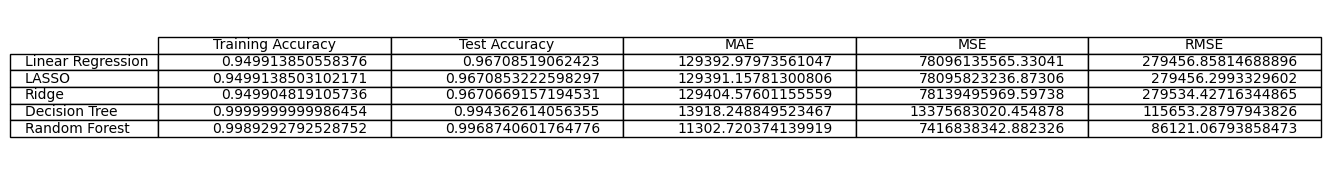

In [52]:
fig, ax = plt.subplots(figsize=(15,2))
ax.axis("tight")
ax.axis("off")
ax.table(cellText=scores.values, rowLabels=scores.index, colLabels=scores.columns, loc="center")

plt.savefig("../visualizations/metricstable.png")

After checking the MAE, MSE, and RMSE for each model, the best model appears to be the Random Forest model. While the Decision Tree has a higher train accuracy, it has a lower test accuracy, which further exemplifies its overfitting. Therefore, the Random Forest is the model that will be used to create the predictive web app.

In [184]:
with open('../models/co2_prediction_rf.pkl', 'wb') as f:
    pickle.dump(best_model5, f)

In [181]:
with open('../models/co2_prediction_dt.pkl', 'wb') as f:
    pickle.dump(best_model4, f)

After testing the Random Forest in the web app, I decided to also check the Decision Tree model and found that, despite it having worse metrics overall, it seemed to predict the tested carbon footprints with more accuracy. Therefore, I ultimately decided to use the Decision Tree model in my predictive app.